In [2]:
import torch
import numpy as np

In [4]:
np_data = np.arange(6).reshape((2, 3))
# numpy矩阵转成torch tensor
torch_data = torch.from_numpy(np_data)
# torch tensor转成numpy 矩阵
tensor2array = torch_data.numpy()
print('numpy:\n', np_data)
print('torch:\n', torch_data)
print('tensor to array:\n', tensor2array)

numpy:
 [[0 1 2]
 [3 4 5]]
torch:
 tensor([[ 0,  1,  2],
        [ 3,  4,  5]], dtype=torch.int32)
tensor to array:
 [[0 1 2]
 [3 4 5]]


In [12]:
# abs
data = [-1, -2, 1, 2]
tensor = torch.FloatTensor(data) # 32 bit
tensor_abs = torch.abs(tensor)
# mean
tensor_mean = torch.mean(tensor)

tensor(0.)

In [16]:
# matrix multiply
data = [[-1, -2], [1, 2]]
tensor = torch.FloatTensor(data)
print('numpy:\n', np.matmul(data, data))
print('torch:\n', torch.mm(tensor, tensor))

numpy:
 [[-1 -2]
 [ 1  2]]
torch:
 tensor([[-1., -2.],
        [ 1.,  2.]])


In [4]:
# 张量分割
t = torch.rand(2, 4, 3, 5)
print(t.size())
t_slice = t[0, 1:3, :, 4]
print('Tensor[0, 1:3, :, 4]\n', t_slice)

# 张量重塑
pytorch_reshape = t.view([6, 5, 4]) # 相当于numpy_reshape = a.reshape([6, 5, 4])
print(pytorch_reshape.size())

torch.Size([2, 4, 3, 5])
Tensor[0, 1:3, :, 4]
 tensor([[ 0.3741,  0.4963,  0.3408],
        [ 0.9541,  0.0046,  0.3202]])
torch.Size([6, 5, 4])


### 注：从v0.4.0开始，PyTorch废除了Variable，将Tensor与Variable合并成新的Tensor，Variable相当于Tensor(requires_grad=True), 可以学习新的Tensor语法。

In [17]:
# variable
from torch.autograd import Variable

In [32]:
# variable用于构造图进行计算，可以用于反向传播，而tensor不能用于反向传播时
tensor = torch.FloatTensor([[1, 2], [3, 4]])
variable = Variable(tensor, requires_grad=True)
print('tensor:\n', tensor)
print('variable:\n', variable)

t_out = torch.mean(tensor * tensor)
v_out = torch.mean(variable * variable)
print(t_out)
print(v_out)

v_out.backward()
# variable的梯度
# v_out = 1/4 * sum(variable * variable)
# d(v_out)/d(var) = 1/4*2*variable = variable/2
print('gradient of variable:')
print(variable.grad)

print(variable.data)
print(variable.data.numpy())

tensor:
 tensor([[ 1.,  2.],
        [ 3.,  4.]])
variable:
 tensor([[ 1.,  2.],
        [ 3.,  4.]])
tensor(7.5000)
tensor(7.5000)
gradient of variable:
tensor([[ 0.5000,  1.0000],
        [ 1.5000,  2.0000]])
tensor([[ 1.,  2.],
        [ 3.,  4.]])
[[ 1.  2.]
 [ 3.  4.]]


In [26]:
# Activation Function
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

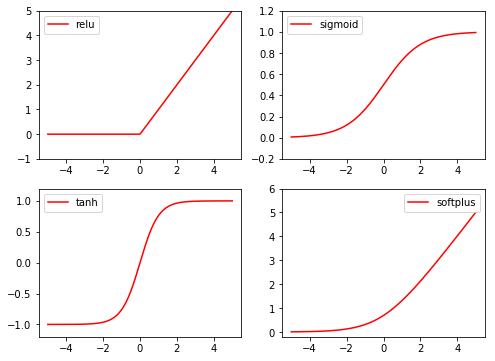

In [38]:
# fake data
x = torch.linspace(-5, 5, 200)
x = Variable(x)
x_np = x.data.numpy()

y_relu = F.relu(x).data.numpy()
y_sigmoid = F.sigmoid(x).data.numpy()
y_tanh = F.tanh(x).data.numpy()
y_softplus = F.softplus(x).data.numpy()
# softmax计算的是分类中的概率
# y_softmax = F.softmax(x)

plt.figure(1, figsize=(8, 6))

plt.subplot(221)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x_np, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x_np, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')